<a href="https://colab.research.google.com/github/AnasMahfudz/DataScienceProject/blob/main/Copy_of_predict_churning_customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Credit Card customers**

**Predict Churning customers**

Problem :

A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers decisions in the opposite direction. We have only 16.07% of customers who have churned. Thus, it's a bit difficult to train our model to predict churning customers.

In [63]:
# import library
import pandas as pd
import numpy as np

#matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
data = pd.read_csv('https://raw.githubusercontent.com/Valdera/Project-DigitalSkola/main/BankChurners.csv')
data = pd.DataFrame(data)
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


# **1. Understanding the Data**

> Based on the note from the data source, I decided to ignore the last 2 columns of the data, so the first thing I did was I had to delete it so it wouldn't interfere when analyzing the overall data

In [65]:
#Deleting the last 2 columns
data.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                   'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
                   'CLIENTNUM'], 
          inplace=True, axis=1)
data

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [66]:
data.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

> Grouping columns by data type

In [67]:
numerical_columns = ["Customer_Age", 
                     "Months_on_book", 
                     "Credit_Limit", 
                     "Total_Revolving_Bal", 
                     "Avg_Open_To_Buy", 
                     "Total_Amt_Chng_Q4_Q1", 
                     "Total_Trans_Amt", 
                     "Total_Trans_Ct", 
                     "Total_Ct_Chng_Q4_Q1", 
                     "Avg_Utilization_Ratio"]

categorical_columns = ['Attrition_Flag',
                       'Gender',
                       'Education_Level',
                       'Marital_Status',
                       'Income_Category',
                       'Card_Category']

discrete_columns = ['CLIENTNUM',
                    'Dependent_count',
                    'Total_Relationship_Count',
                    'Months_Inactive_12_mon',
                    'Contacts_Count_12_mon']

# **2. Identify the Data**

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [69]:
print(data.duplicated().sum())
print(data.isnull().sum())

0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64


Because there are no null values and duplicated values found, it can be said that this data is clean, and can be continued for data analysis by looking at the distribution of the data.

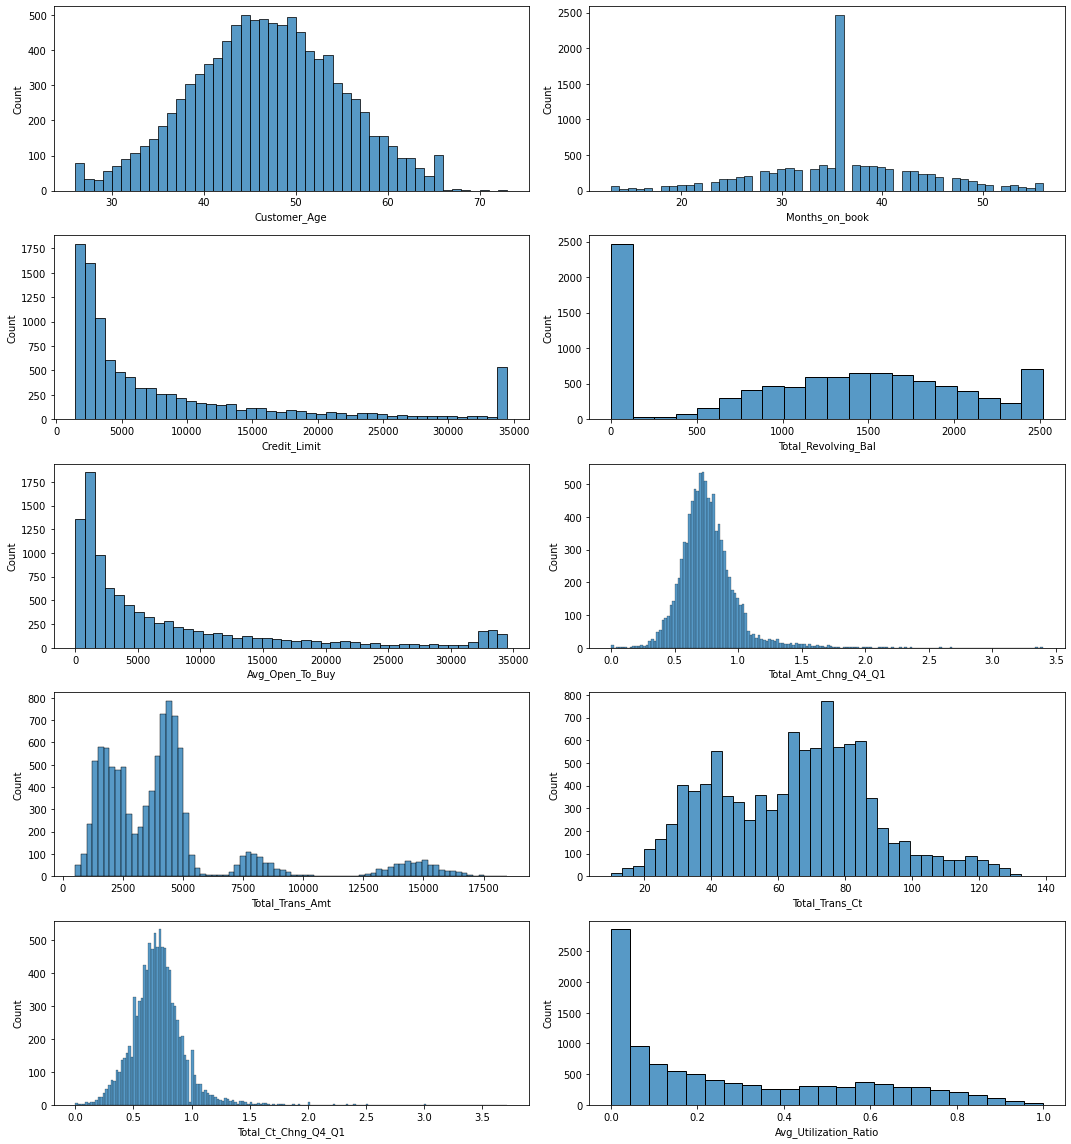

In [70]:
# Numerical Value 
fig, axes = plt.subplots(5,2, figsize=(15,16))
axes = [ax for axes_row in axes for ax in axes_row]

for i, col in enumerate(numerical_columns):
  plot = sns.histplot(data=data, x=col, ax=axes[i], fill=True)
plt.tight_layout()

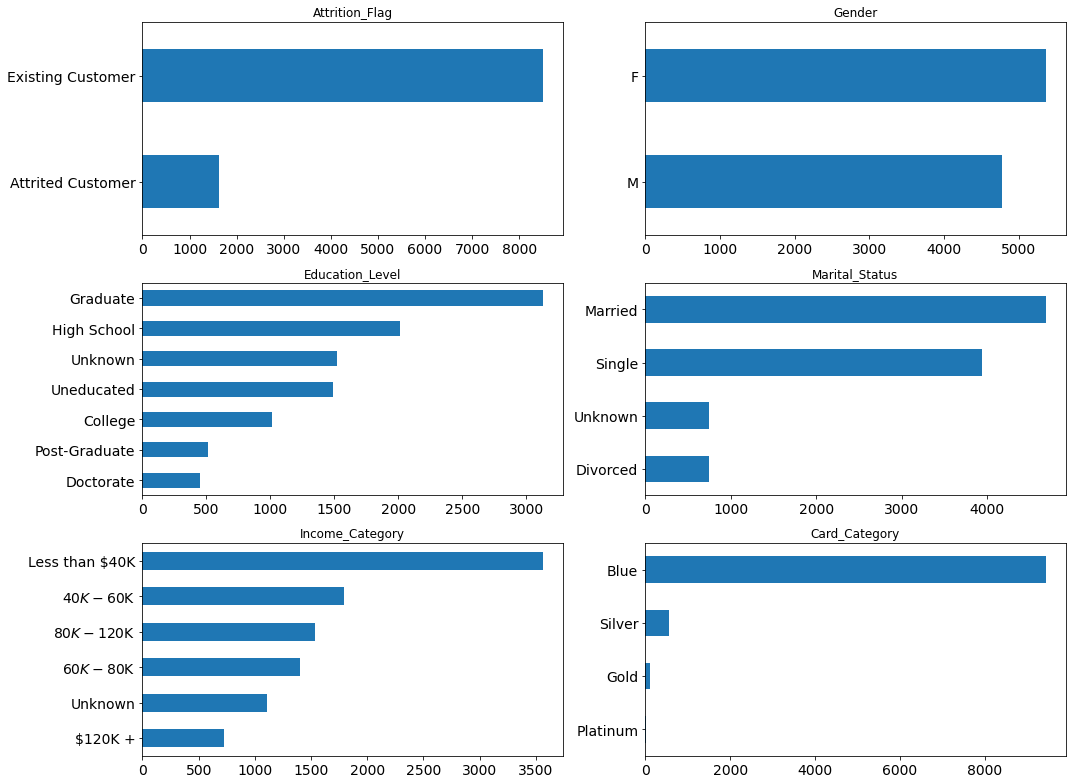

In [71]:
# Categorical Value
fig, axes = plt.subplots(3,2, figsize=(15,11))
axes = [ax for axes_row in axes for ax in axes_row]

for i, col in enumerate(categorical_columns):
  data[col].value_counts()[::-1].plot(kind='barh',ax=axes[i], title=col, fontsize=14)
  axes[i].set_ylabel('')
plt.tight_layout()

# **3. Analyze the Data**

> **Analyze the data better focus on attrition_Flag column to dig more information about churning customers**

> The first analysis is to look for outliers values, because these values must be determined to see the pattern of distribution so that we can study the data better.

> To find outliers, it is necessary to pay attention to using a boxplot chart

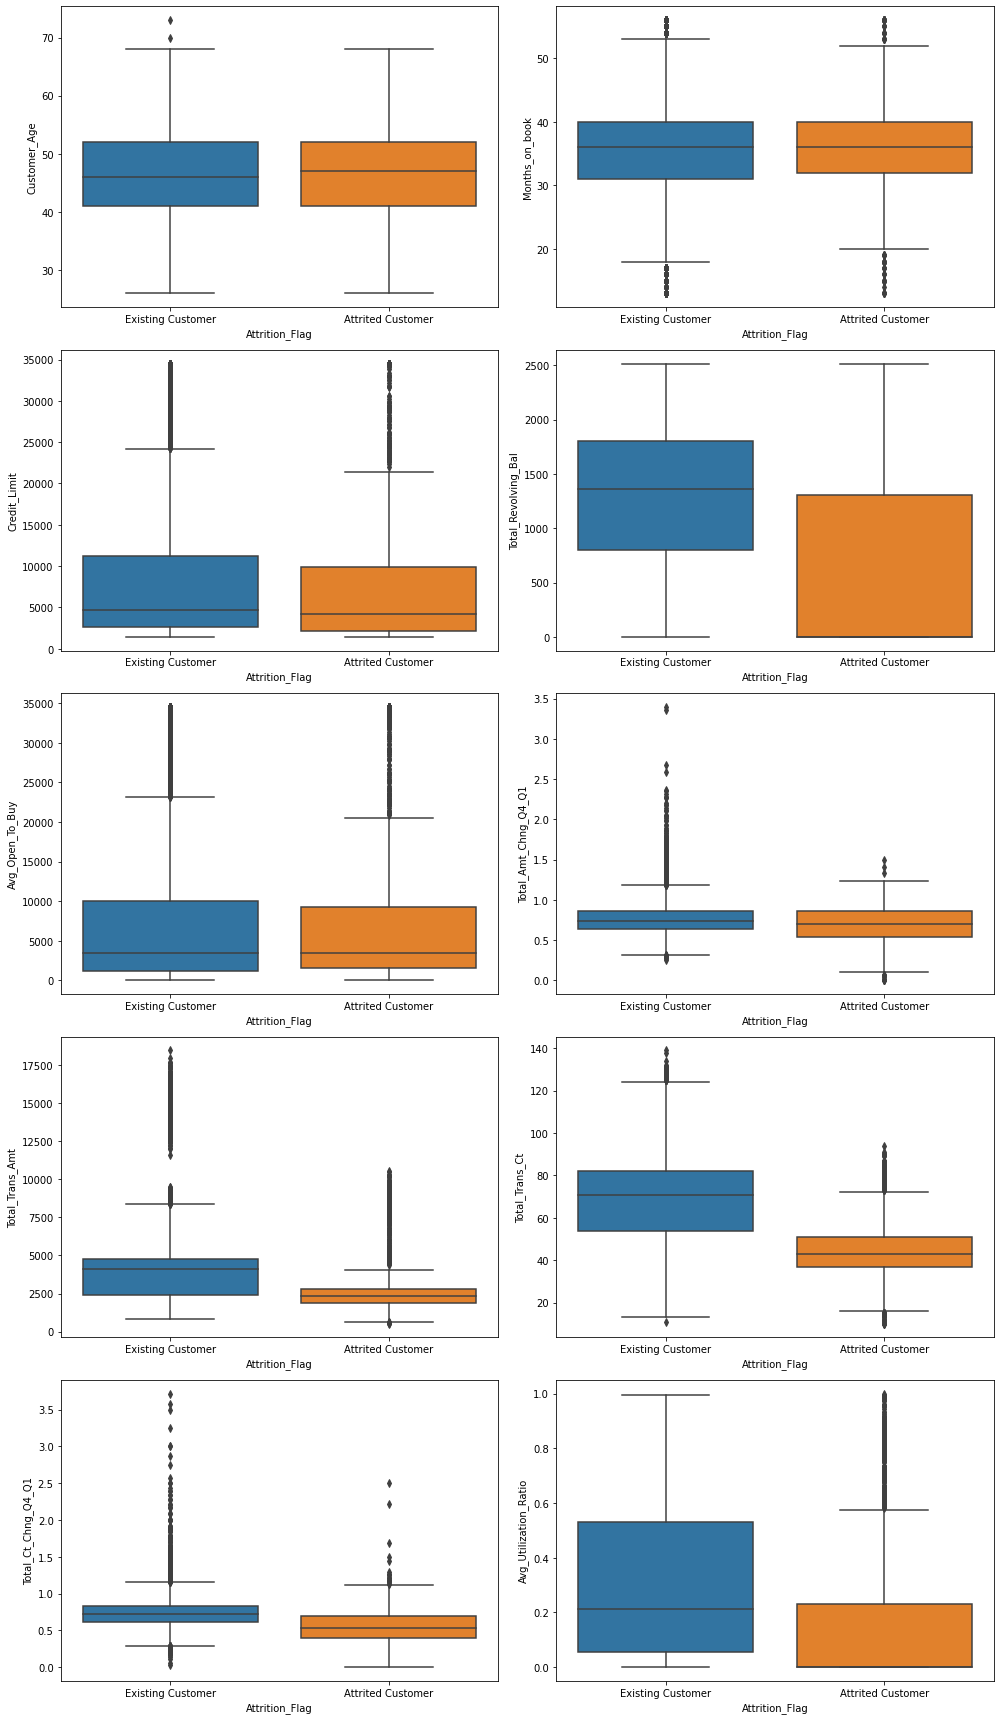

In [72]:
fig, axes = plt.subplots(5,2, figsize=(14,24))
axes = [ax for axes_row in axes for ax in axes_row]

for i, col in enumerate(numerical_columns):
    plot = sns.boxplot(data=data, y=col, x='Attrition_Flag', ax=axes[i])
plt.tight_layout()

# **4. Data Pre-Processing**

## Label Encoding

> Then the analysis continues by seeing how the level of correlation between all columns, but the first do Label Encoder to change "Existing Customer" = 1, and "Attrited Customer" = 0

In [94]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

cat_features = ['Attrition_Flag',
                'Gender',
                'Education_Level',
                'Marital_Status',
                'Income_Category',
                'Card_Category']
le = LabelEncoder()
for i in cat_features:
  data[i] = le.fit_transform(data[i])

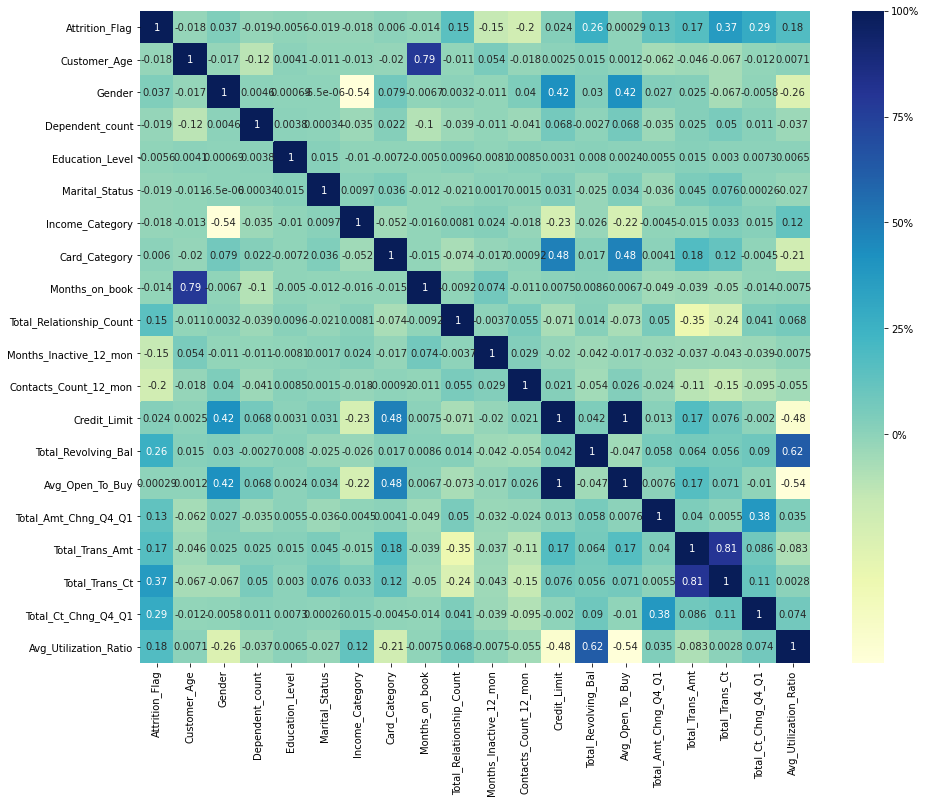

In [96]:
plt.figure(figsize=(15,12))
ax = sns.heatmap(data.corr(), annot=True,cmap="YlGnBu")
cbar = ax.collections[0].colorbar
cbar.set_ticks([0, .25, .50, .75, 1])
cbar.set_ticklabels(['0%', '25%','50%', '75%', '100%'])
plt.show()

## Defining Feature and Label

In [97]:
#Defining Feature and Label
df_X = data.drop(['Attrition_Flag'],axis=1)
df_y = data['Attrition_Flag']

In [101]:
data

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,0,4,3,3,4,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,1,3,5,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1,50,1,2,2,2,1,0,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,0,41,1,2,6,0,1,0,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,0,44,0,1,3,1,4,0,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,0,30,1,2,2,3,1,0,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [99]:
df_X

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,0,4,3,3,4,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,1,3,5,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,1,2,2,2,1,0,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,41,1,2,6,0,1,0,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,44,0,1,3,1,4,0,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,30,1,2,2,3,1,0,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [100]:
df_y

0        1
1        1
2        1
3        1
4        1
        ..
10122    1
10123    0
10124    0
10125    0
10126    0
Name: Attrition_Flag, Length: 10127, dtype: int64

## Removing Ouliers (STD Method)

In [80]:
# Before Removing Outliers
data['Attrition_Flag'].value_counts()

1    8500
0    1627
Name: Attrition_Flag, dtype: int64

In [81]:
#Removing Outliers Function (Standard Deviation Method)
def remove_outliers(data, columns, tresh=3):
    dataset = data.copy()
    index_to_remove = []
    value_to_remove = []
    for col in columns:
        array_to_remove = dataset[col].values
        mean, std = np.mean(array_to_remove), np.std(array_to_remove)
        z_score = np.abs((array_to_remove - mean) / std)
        threshold = tresh
        good = z_score < threshold
        for i in range(len(good)):
            if good[i] == False:
                index_to_remove.append(i)
                value_to_remove.append(array_to_remove[i])
    index_to_remove = np.unique(np.array(index_to_remove))
    print("Removed rows: ", len(index_to_remove))
    dataset = dataset.drop(dataset.index[index_to_remove])
    return dataset

In [82]:
data_after_removing_outliers = remove_outliers(data, numerical_columns)

Removed rows:  642


In [83]:
data_after_removing_outliers['Attrition_Flag'].value_counts()

1    7876
0    1609
Name: Attrition_Flag, dtype: int64

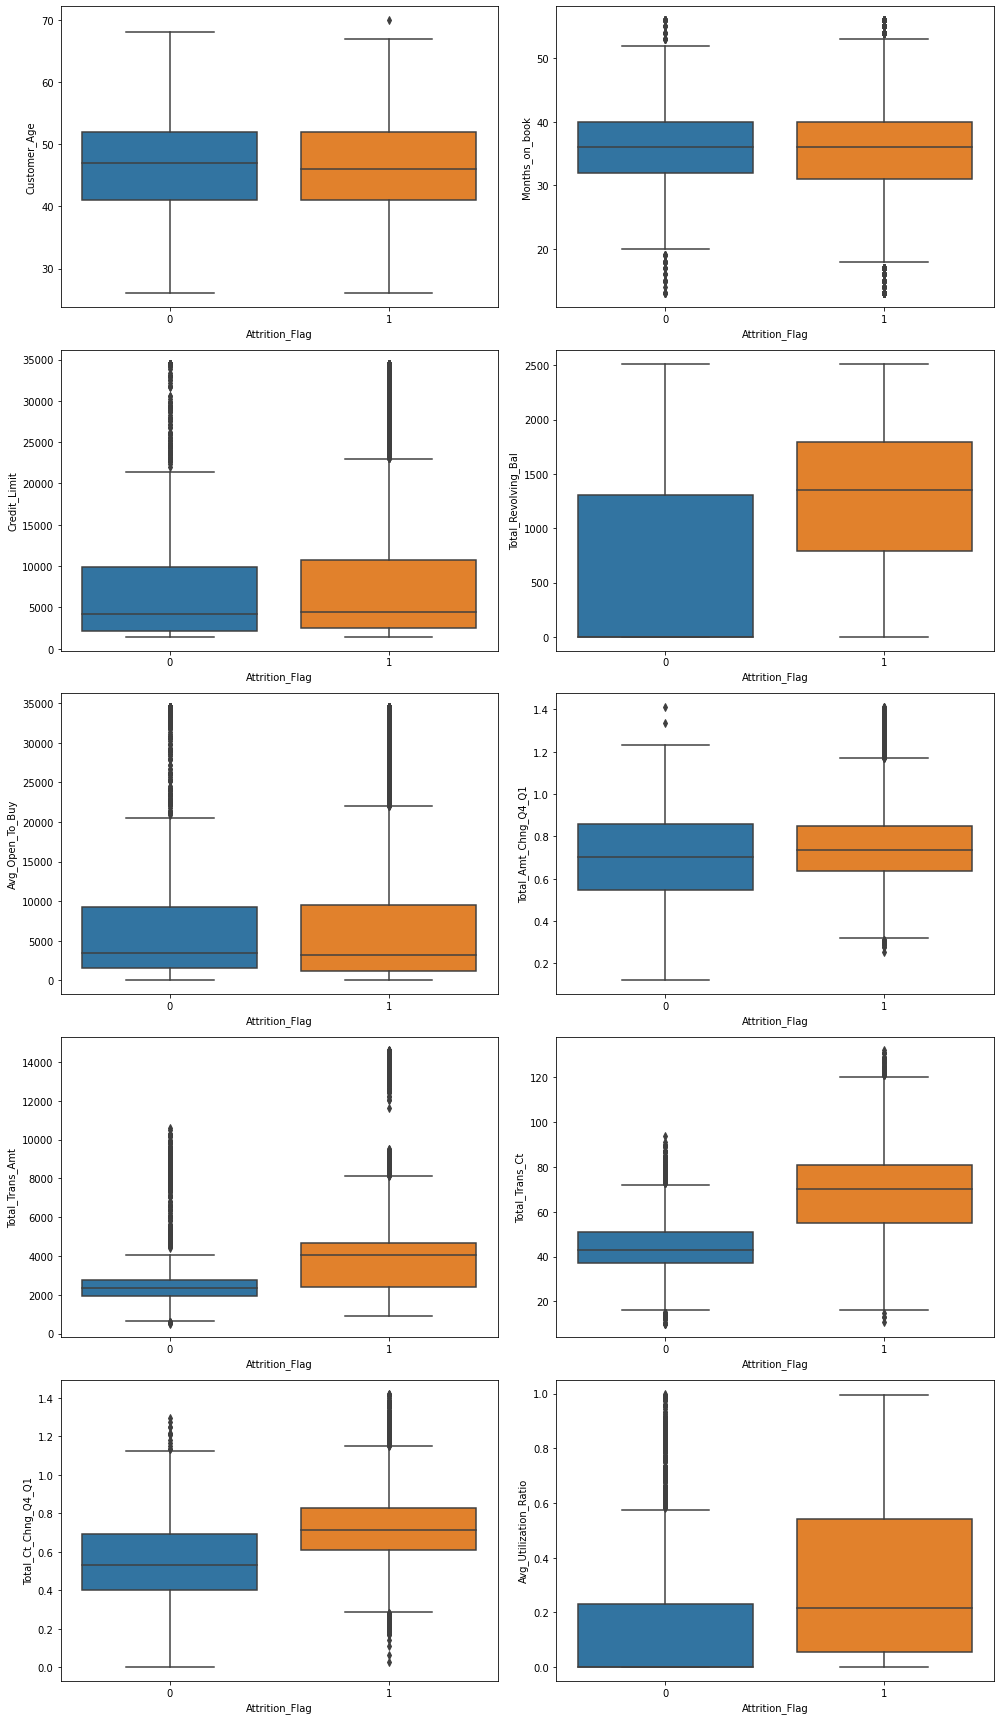

In [84]:
fig, axes = plt.subplots(5,2, figsize=(14,24))
axes = [ax for axes_row in axes for ax in axes_row]

for i, col in enumerate(numerical_columns):
    plot = sns.boxplot(data=data_after_removing_outliers, y=col, x='Attrition_Flag', ax=axes[i])
plt.tight_layout()

In [85]:
X = data_after_removing_outliers.drop(['Attrition_Flag'],1)
y = data_after_removing_outliers['Attrition_Flag']

# **5. Develop Model**

In [86]:
#import Library

# Label Encoder Library
from sklearn.preprocessing import LabelEncoder

# Split Train & Test
from sklearn.model_selection import train_test_split

# Oversampling Library
from imblearn.combine import SMOTEENN

# Scalling Library
from sklearn.preprocessing import StandardScaler

# Pipeline Library
from sklearn.pipeline import Pipeline, make_pipeline

# ML Modelling Library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

# Validation Library
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

# Evaluation Metrics Library
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

# Warning Library
import warnings
warnings.filterwarnings('ignore')

## **Model using Data without Removing Outliers**

KNN
Accuracy :  0.8425468904244817
Precision :  0.7364699928554417
Specificity :  0.8431484251394507
Confusion matrix :
[[ 276   51]
 [ 268 1431]]
Plot Confusion Matrix :


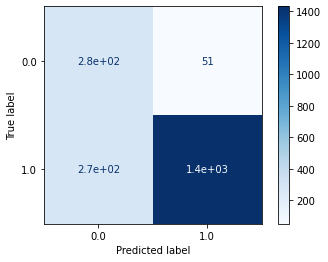

--------

SVC
Accuracy :  0.9126357354392892
Precision :  0.8269213354262256
Specificity :  0.8898767578698029
Confusion matrix :
[[ 280   47]
 [ 130 1569]]
Plot Confusion Matrix :


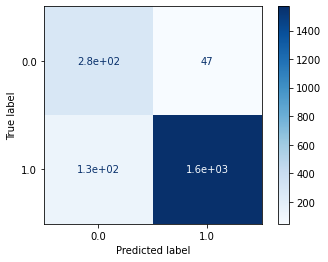

--------

LR
Accuracy :  0.8376110562685094
Precision :  0.730503168003168
Specificity :  0.8352664726327593
Confusion matrix :
[[ 272   55]
 [ 274 1425]]
Plot Confusion Matrix :


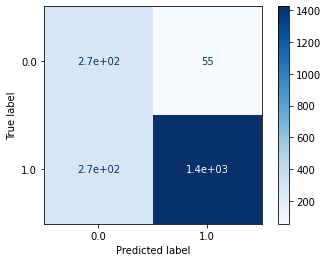

--------

DT
Accuracy :  0.9067127344521224
Precision :  0.817299566759504
Specificity :  0.8838757463015661
Confusion matrix :
[[ 278   49]
 [ 140 1559]]
Plot Confusion Matrix :


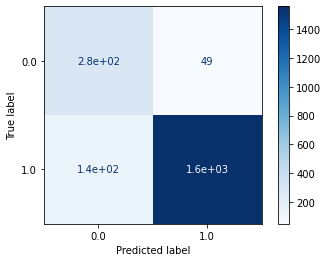

--------

RF
Accuracy :  0.9466929911154985
Precision :  0.8874059513209389
Specificity :  0.9299389999154026
Confusion matrix :
[[ 296   31]
 [  77 1622]]
Plot Confusion Matrix :


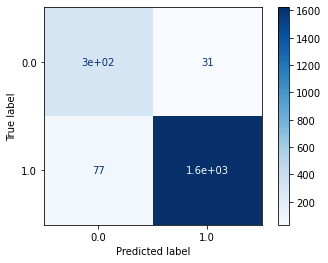

--------

XGBoost
Accuracy :  0.9466929911154985
Precision :  0.8850380361975563
Specificity :  0.9361128060578898
Confusion matrix :
[[ 301   26]
 [  82 1617]]
Plot Confusion Matrix :


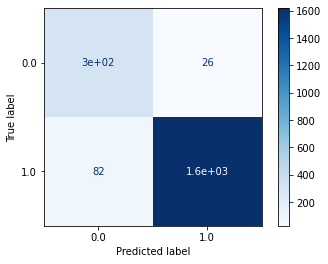

--------

Light GBM
Accuracy :  0.9496544916090819
Precision :  0.8928559213687185
Specificity :  0.9341742669280184
Confusion matrix :
[[ 298   29]
 [  73 1626]]
Plot Confusion Matrix :


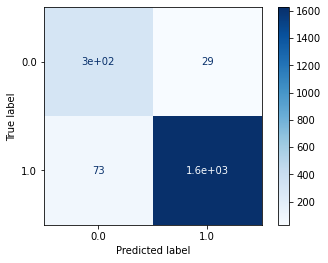

--------



In [102]:
# Split Train & Test

X = df_X.astype(float).values
y = df_y.astype(float).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Oversampling (SMOTEENN)
smoteen = SMOTEENN()
X_train, y_train = smoteen.fit_resample(X_train, y_train)

# Construct some pipelines
pipe_knn = make_pipeline(StandardScaler(), KNeighborsClassifier())
pipe_svc = make_pipeline(StandardScaler(), SVC())
pipe_lr = make_pipeline(StandardScaler(), LogisticRegression())
pipe_dt = make_pipeline(StandardScaler(), DecisionTreeClassifier())
pipe_rf = make_pipeline(StandardScaler(), RandomForestClassifier())
pipe_xgb = make_pipeline(StandardScaler(), XGBClassifier())
pipe_lgb = make_pipeline(StandardScaler(), lgb.LGBMClassifier())

pipes = [pipe_knn, pipe_svc, pipe_lr, pipe_dt, pipe_rf, pipe_xgb, pipe_lgb]
names_pipes = ['KNN','SVC','LR','DT','RF','XGBoost','Light GBM']

for i in range(len(pipes)):
  print(names_pipes[i])
  pipes[i].fit(X_train, y_train)
  y_pred = pipes[i].predict(X_test)
  print('Accuracy : ',accuracy_score(y_test, y_pred))    
  print('Precision : ',precision_score(y_test, y_pred, average='macro'))  
  sens, spec, sup = sensitivity_specificity_support(y_test,y_pred, average='macro')
  print('Specificity : ',spec)
  print('Confusion matrix :')
  print(confusion_matrix(y_test, y_pred))
  print('Plot Confusion Matrix :')
  plot_confusion_matrix(pipes[i], X_test, y_test, cmap=plt.cm.Blues)  
  plt.show()
  print('--------')
  print('')



## **Model using data_after_removing_outliers**

KNN
Accuracy :  0.8550342646283605
Precision :  0.764078108930083
Specificity :  0.8652039291052744
Confusion matrix :
[[ 296   40]
 [ 235 1326]]
Plot Confusion Matrix :


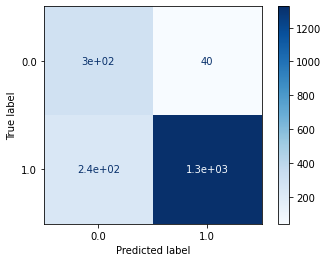

----------------------------------------------------------------------

SVC
Accuracy :  0.9014232999472852
Precision :  0.821540412662797
Specificity :  0.8770419602818706
Confusion matrix :
[[ 282   54]
 [ 133 1428]]
Plot Confusion Matrix :


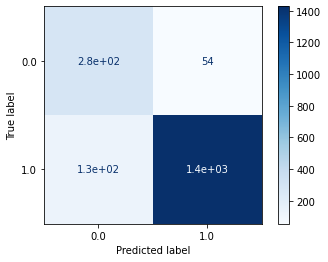

----------------------------------------------------------------------

LR
Accuracy :  0.823405376910912
Precision :  0.7308920449271326
Specificity :  0.8319720264787529
Confusion matrix :
[[ 284   52]
 [ 283 1278]]
Plot Confusion Matrix :


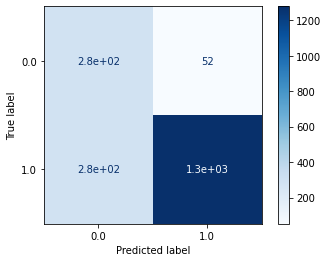

----------------------------------------------------------------------

DT
Accuracy :  0.9088033737480232
Precision :  0.8324957741331263
Specificity :  0.8885329916720051
Confusion matrix :
[[ 288   48]
 [ 125 1436]]
Plot Confusion Matrix :


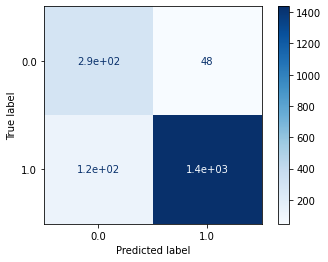

----------------------------------------------------------------------

RF
Accuracy :  0.9351607801792303
Precision :  0.8737976490344248
Specificity :  0.924400758061072
Confusion matrix :
[[ 305   31]
 [  92 1469]]
Plot Confusion Matrix :


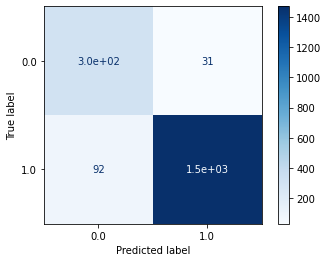

----------------------------------------------------------------------

XGBoost
Accuracy :  0.9451765946230891
Precision :  0.8879240919150069
Specificity :  0.9445000533845825
Confusion matrix :
[[ 317   19]
 [  85 1476]]
Plot Confusion Matrix :


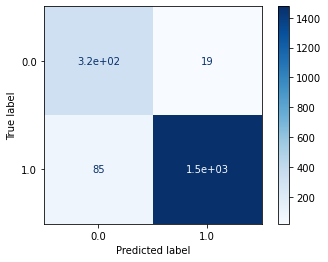

----------------------------------------------------------------------

Light GBM
Accuracy :  0.9520295202952029
Precision :  0.9006735207507566
Specificity :  0.9498318385650224
Confusion matrix :
[[ 318   18]
 [  73 1488]]
Plot Confusion Matrix :


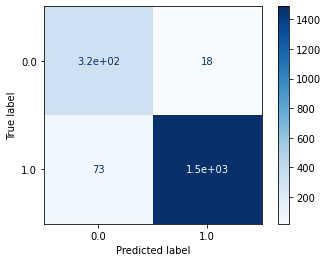

----------------------------------------------------------------------



In [105]:
#Defining Feature and Label
df_X = data_after_removing_outliers.drop(['Attrition_Flag'],axis=1)
df_y = data_after_removing_outliers['Attrition_Flag']

#Label encoding for Categorical value
cat_features = ['Gender',
                'Education_Level',
                'Marital_Status',
                'Income_Category',
                'Card_Category']
le = LabelEncoder()
for i in cat_features:
  df_X[i] = le.fit_transform(df_X[i])

# Split Train & Test
X = df_X.astype(float).values
y = df_y.astype(float).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Oversampling (SMOTEENN)
smoteen = SMOTEENN()
X_train, y_train = smoteen.fit_resample(X_train, y_train)

# Construct some pipelines
pipe_knn = make_pipeline(StandardScaler(), KNeighborsClassifier())
pipe_svc = make_pipeline(StandardScaler(), SVC())
pipe_lr = make_pipeline(StandardScaler(), LogisticRegression())
pipe_dt = make_pipeline(StandardScaler(), DecisionTreeClassifier())
pipe_rf = make_pipeline(StandardScaler(), RandomForestClassifier())
pipe_xgb = make_pipeline(StandardScaler(), XGBClassifier())
pipe_lgb = make_pipeline(StandardScaler(), lgb.LGBMClassifier())

pipes = [pipe_knn, pipe_svc, pipe_lr, pipe_dt, pipe_rf, pipe_xgb, pipe_lgb]
names_pipes = ['KNN','SVC','LR','DT','RF','XGBoost','Light GBM']

for i in range(len(pipes)):
  print(names_pipes[i])
  pipes[i].fit(X_train, y_train)
  y_pred = pipes[i].predict(X_test)
  print('Accuracy : ',accuracy_score(y_test, y_pred))    
  print('Precision : ',precision_score(y_test, y_pred, average='macro'))  
  sens, spec, sup = sensitivity_specificity_support(y_test,y_pred, average='macro')
  print('Specificity : ',spec)
  print('Confusion matrix :')
  print(confusion_matrix(y_test, y_pred))
  print('Plot Confusion Matrix :')
  plot_confusion_matrix(pipes[i], X_test, y_test, cmap=plt.cm.Blues)  
  plt.show()
  print('----------------------------------------------------------------------')
  print('')



# **Evaluation**

In [ ]:
# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(gbm.feature_importances_,X.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')